In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bhp = pd.read_csv('./CSV Files/bhp.csv')

In [4]:
bhp.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
bhp.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [6]:
bhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [7]:
bhp.nunique()

location           241
size                31
total_sqft        1972
bath                19
price             1952
bhk                 19
price_per_sqft    4951
dtype: int64

In [8]:
bhp.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [9]:
bhp.price_per_sqft.min()

267

In [14]:
bhp.price_per_sqft.max()

12000000

<AxesSubplot:xlabel='price'>

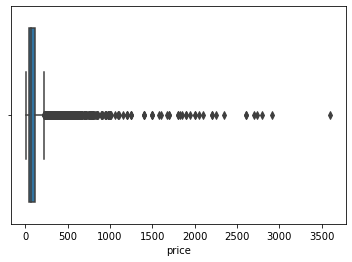

In [23]:
sns.boxplot(x=bhp['price'])

In [16]:
bhp.shape

(13200, 7)

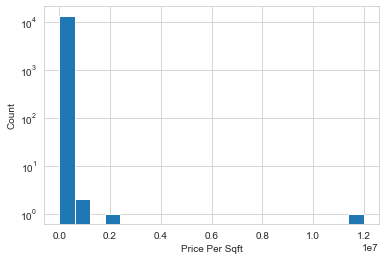

In [40]:
plt.hist(bhp['price_per_sqft'], bins=20)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')
plt.yscale('log')

## Remove Outlier using percentile

In [42]:
lower_limit, upper_limit = bhp.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [43]:
bhp2 = bhp[(bhp.price_per_sqft<upper_limit) & (bhp.price_per_sqft>lower_limit)]
bhp2.shape

(13172, 7)

In [44]:
bhp.shape

(13200, 7)

In [45]:
bhp.shape[0] - bhp2.shape[0]

28

## Remove Outlier using 4 standard deviation

In [47]:
min_limit = bhp2.price_per_sqft.mean() - 4 * bhp2.price_per_sqft.std()
max_limit = bhp2.price_per_sqft.mean() + 4 * bhp2.price_per_sqft.std()

min_limit, max_limit

(-9900.429065502549, 23227.73653589429)

In [48]:
bhp3 = bhp2[(bhp2.price_per_sqft<max_limit) & (bhp2.price_per_sqft>min_limit)]

In [49]:
bhp2.shape[0] - bhp3.shape[0]

125

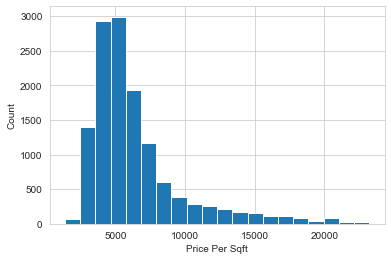

In [52]:
plt.hist(bhp3['price_per_sqft'], bins=20)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')
plt.show()

In [53]:
bhp3.mean()

total_sqft        1529.296249
bath                 2.666130
price              105.850314
bhk                  2.776270
price_per_sqft    6449.328045
dtype: float64

## Remove outlier using Z score

In [59]:
import warnings
warnings.filterwarnings('ignore')


bhp2['zscore'] = (bhp2.price_per_sqft - bhp2.price_per_sqft.mean()) / bhp2.price_per_sqft.std()

In [55]:
bhp2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
12271,other,2 Bedroom,1200.0,1.0,50.0,2,4166,-0.603149
3851,other,2 BHK,1200.0,2.0,55.0,2,4583,-0.502449
8075,other,1 BHK,500.0,1.0,20.0,1,4000,-0.643236
11654,HSR Layout,2 BHK,1120.0,2.0,70.0,2,6250,-0.099892
3016,Ambalipura,2 BHK,1332.0,2.0,79.0,2,5930,-0.177167
8299,Malleshwaram,3 BHK,2050.0,4.0,270.0,3,13170,1.571194
10486,Whitefield,3 BHK,1760.0,3.0,160.0,3,9090,0.585930
6748,Frazer Town,3 BHK,1706.0,3.0,154.0,3,9026,0.570474
11517,other,2 BHK,1230.0,2.0,50.0,2,4065,-0.627539
12634,Begur Road,2 BHK,1160.0,2.0,42.0,2,3620,-0.735001


In [56]:
bhp4 = bhp2[(bhp2.zscore > -4) & (bhp2.zscore < 4)]

In [57]:
bhp2.shape[0] - bhp4.shape[0]

125

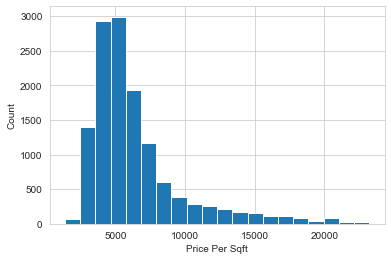

In [58]:
plt.hist(bhp4['price_per_sqft'], bins=20)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')
plt.show()